# Concise Implementation of Softmax Regression
Just as high-level deep learning frameworks made it easier to implement linear regression (see Section 3.5), they are similarly convenient here.

## Defining the Model

As in Section 3.5, we construct our fully connected layer using the built-in layer. We use a `flatten` layer to reshape arbitrarly-shaped input into a matrix-shaped output, preserving the size of the last dimension..

In [1]:
using Flux
model = Chain(Flux.flatten,Dense(28*28=>10))

Chain(
  Flux.flatten,
  Dense(784 => 10),                     # 7_850 parameters
) 

## Softmax Revisited

In [2]:
loss(model,x,y) = Flux.logitcrossentropy(model(x),y)

loss (generic function with 1 method)

## Training

Next we train our model. We use Fashion-MNIST images, flattened to 784-dimensional feature vectors.

In [3]:
using MLUtils
using MLDatasets
using MLBase

# data prepare
ENV["DATADEPS_ALWAYS_ACCEPT"] = true
mnist_train,mnist_test = FashionMNIST(:train),FashionMNIST(:test)
features = mnist_train.features
labels = Flux.onehotbatch(mnist_train.targets,0:9)
train_loader = DataLoader((features,labels),batchsize=256)

mnist_accuracy(model, data::FashionMNIST) = correctrate(classify(model(data.features)).-1,data.targets)

# train
num_epochs = 10
results = map(1:num_epochs) do i
    for data in train_loader
        Flux.train!(loss,model,[data],Descent())
    end
    loss(model,features,labels),mnist_accuracy(model,mnist_train),mnist_accuracy(model, mnist_test)
end
train_loss, train_acc, test_acc = map(x->getindex.(results,x),1:3)

3-element Vector{Vector}:
 Float32[0.6151819, 0.5413316, 0.5090037, 0.4895458, 0.47606862, 0.4659756, 0.45803085, 0.45155552, 0.44613948, 0.44151744]
 [0.79765, 0.8203666666666667, 0.8302166666666667, 0.836, 0.8398, 0.8427333333333333, 0.84545, 0.84745, 0.8488333333333333, 0.85015]
 [0.7829, 0.8083, 0.8187, 0.8246, 0.8269, 0.8282, 0.8309, 0.8326, 0.8345, 0.8342]

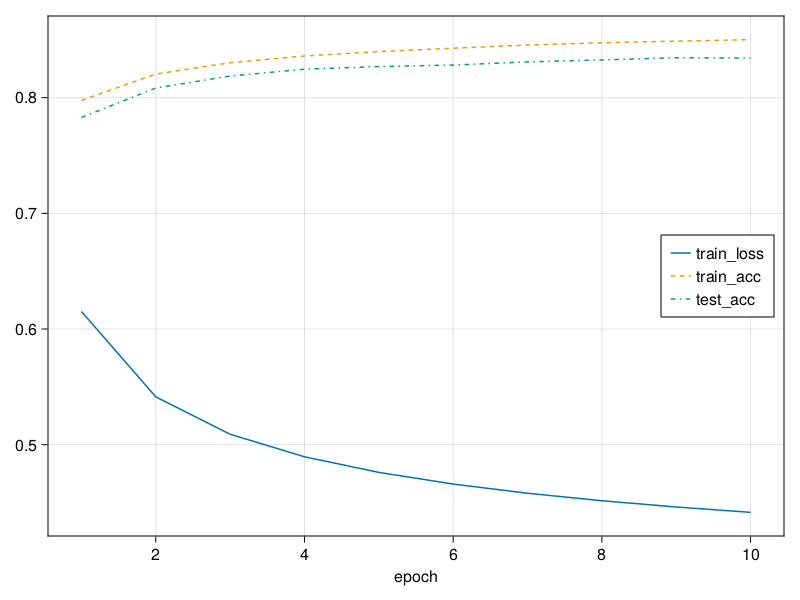

In [12]:
using CairoMakie

f,ax = lines(train_loss,label="train_loss";axis=(;xlabel="epoch"))
lines!(ax,train_acc,label="train_acc",linestyle=:dash)
lines!(ax,test_acc,label="test_acc",linestyle=:dashdot)
axislegend(position = :rc)
f